In [1]:
# Librerías
library(readxl)
library(readxl)
library(dplyr)
library(car)
library(explore)
library(psych)
library(corrplot)
library(readr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘car’ was built under R version 4.3.3”
Loading required package: carData

Warning message:
“package ‘carData’ was built under R version 4.3.3”

Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


Warning message:
“package ‘explore’ was built under R version 4.3.3”
Warning message:
“package ‘psych’ was built under R version 4.3.3”

Attaching package: ‘psych’


The following object is masked from ‘package:explore’:

    describe


The following object is masked from ‘package:car’:

    logit


Warning message:
“package ‘corrplot’ was built under R version 4.3.3”
corrplot 0.95 loaded



In [32]:
options(scipen = 999)

# Data Regresión

In [27]:
ruta <- "Train real state.csv"
data <- read_csv(ruta)
#data <- read_csv("Test real state.csv", col_names = c("ID", "SalePrice", "YearBuilt", "YrSold", "MonthSold", "Size.sqf.", "Floor", "HallwayType", "HeatingType", "AptManageType", "N_Parkinglot.Ground.", "N_Parkinglot.Basement.", "TimeToBusStop", "TimeToSubway", "N_APT", "N_manager", "N_elevators", "SubwayStation", "N_FacilitiesNearBy.PublicOffice.", "N_FacilitiesNearBy.Hospital.", "N_FacilitiesNearBy.Dpartmentstore.", "N_FacilitiesNearBy.Mall.", "N_FacilitiesNearBy.ETC.", "N_FacilitiesNearBy.Park.", "N_SchoolNearBy.Elementary.", "N_SchoolNearBy.Middle.", "N_SchoolNearBy.High.", "N_SchoolNearBy.University.", "N_FacilitiesInApt", "N_FacilitiesNearBy.Total.", "N_SchoolNearBy.Total."))
#data <- read_csv("Train real state.csv", col_names = TRUE)
#names(data)[1] <- "ID"
#options(width = 200)
head(data)

New names:
• `` -> `...1`
Rows: 4124 Columns: 31
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): HallwayType, HeatingType, AptManageType, TimeToBusStop, TimeToSubway, SubwayStation
dbl (25): ...1, SalePrice, YearBuilt, YrSold, MonthSold, Size.sqf., Floor, N_Parkinglot.Ground., N_Parkinglot.Basement., N_APT, N_manager, N_elevators, N_FacilitiesNearBy.PublicOffice., N_Faciliti...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,SalePrice,YearBuilt,YrSold,MonthSold,Size.sqf.,Floor,HallwayType,HeatingType,AptManageType,⋯,N_FacilitiesNearBy.Mall.,N_FacilitiesNearBy.ETC.,N_FacilitiesNearBy.Park.,N_SchoolNearBy.Elementary.,N_SchoolNearBy.Middle.,N_SchoolNearBy.High.,N_SchoolNearBy.University.,N_FacilitiesInApt,N_FacilitiesNearBy.Total.,N_SchoolNearBy.Total.
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,⋯,1,1,0,3,2,2,2,5,6,9
2,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,⋯,1,2,1,2,1,1,0,3,12,4
3,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,⋯,1,2,1,2,1,1,0,3,12,4
5,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,⋯,1,5,0,4,3,5,5,4,14,17
7,78318,1992,2007,8,644,2,mixed,individual_heating,self_management,⋯,1,1,0,3,3,4,4,3,9,14
8,61946,1993,2007,8,644,10,mixed,individual_heating,management_in_trust,⋯,1,5,0,4,3,5,5,4,14,17


In [22]:
#View(data)#

In [ ]:
glimpse(data) SalePrice, YearBuilt, YrSold, MonthSold, Size.sqf., Floor, N_Parkinglot.Ground. N_Parkinglot.Basement., N_APT, N_manager

Rows: 4,124
Columns: 31
$ ...1                               <dbl> 1, 2, 3, 5, 7, 8, 10, 11, 12, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 27, 29, 30, 31, 33, 35, 38, 39, 40, 41, 43, 44, 46, 47, 48, 50, 51, 53, 59, 60, 61, 6…
$ SalePrice                          <dbl> 141592, 51327, 48672, 221238, 78318, 61946, 83185, 168141, 153982, 200884, 60176, 185840, 120796, 176991, 55752, 92035, 181061, 198230, 185840, 448672, 167…
$ YearBuilt                          <dbl> 2006, 1985, 1985, 1993, 1992, 1993, 1992, 1986, 1986, 2007, 1985, 1993, 1993, 1993, 1992, 1993, 2007, 2007, 2007, 2007, 2006, 2007, 1997, 1985, 1993, 1993,…
$ YrSold                             <dbl> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007,…
$ MonthSold                          <dbl> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11,

In [29]:
dim(data)

[1] 4124   31

In [37]:
colSums(is.na(data))


...1                          SalePrice                          YearBuilt                             YrSold                          MonthSold 
                                 0                                  0                                  0                                  0                                  0 
                         Size.sqf.                              Floor                        HallwayType                        HeatingType                      AptManageType 
                                 0                                  0                                  0                                  0                                  0 
              N_Parkinglot.Ground.             N_Parkinglot.Basement.                      TimeToBusStop                       TimeToSubway                              N_APT 
                                 0                                  0                                  0                                  0                                  0 
                         N_manager                        N_elevators                      SubwayStation   N_FacilitiesNearBy.PublicOffice.       N_FacilitiesNearBy.Hospital. 
                                 0                                  0                                  0                                  0                                  0 
N_FacilitiesNearBy.Dpartmentstore.           N_FacilitiesNearBy.Mall.            N_FacilitiesNearBy.ETC.           N_FacilitiesNearBy.Park.         N_SchoolNearBy.Elementary. 
                                 0                                  0                                  0                                  0                                  0 
            N_SchoolNearBy.Middle.               N_SchoolNearBy.High.         N_SchoolNearBy.University.                  N_FacilitiesInApt          N_FacilitiesNearBy.Total. 
                                 0                                  0                                  0                                  0                                  0 
             N_SchoolNearBy.Total. 
                                 0

In [33]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
...1,1,4124,2951.8048012,1698.5999442,2966.5,2953.6357576,2185.3524,1,5890,5889,-0.01147475,-1.2029935,26.450371563
SalePrice,2,4124,221687.6178468,106353.1865756,207964.0,215916.4300000,104963.6322,32743,585840,553097,0.47980600,-0.3084196,1656.117622844
YearBuilt,3,4124,2002.9747818,8.8461584,2006.0,2003.7654545,4.4478,1978,2015,37,-0.80913783,-0.3598156,0.137751197
YrSold,4,4124,2012.7019884,2.9034401,2013.0,2012.7593939,4.4478,2007,2017,10,-0.15007251,-1.1798272,0.045211982
MonthSold,5,4124,6.1627061,3.3824756,6.0,6.1230303,4.4478,1,12,11,0.10820934,-1.1395532,0.052671458
Size.sqf.,6,4124,955.9090689,376.9054483,910.0,922.8909091,394.3716,135,2337,2202,0.87115261,0.8370424,5.869121322
Floor,7,4124,12.0647430,7.6164692,11.0,11.4363636,7.4130,1,43,42,0.79846194,0.5954025,0.118602641
HallwayType*,8,4124,2.5016974,0.6793778,3.0,2.6269697,0.0000,1,3,2,-1.01761481,-0.2151102,0.010579181
HeatingType*,9,4124,1.9485936,0.2208520,2.0,2.0000000,0.0000,1,2,1,-4.06140583,14.4985331,0.003439078


## Explorando la variable objetivo SalesPrice

[1] 556637 527433 513274 570796 530973 566371 530973 526548 517699 517699 530973 529203 526548 522123 564601 529203 566371 515929 585840 515044 526548 522123 557522 570796 511504

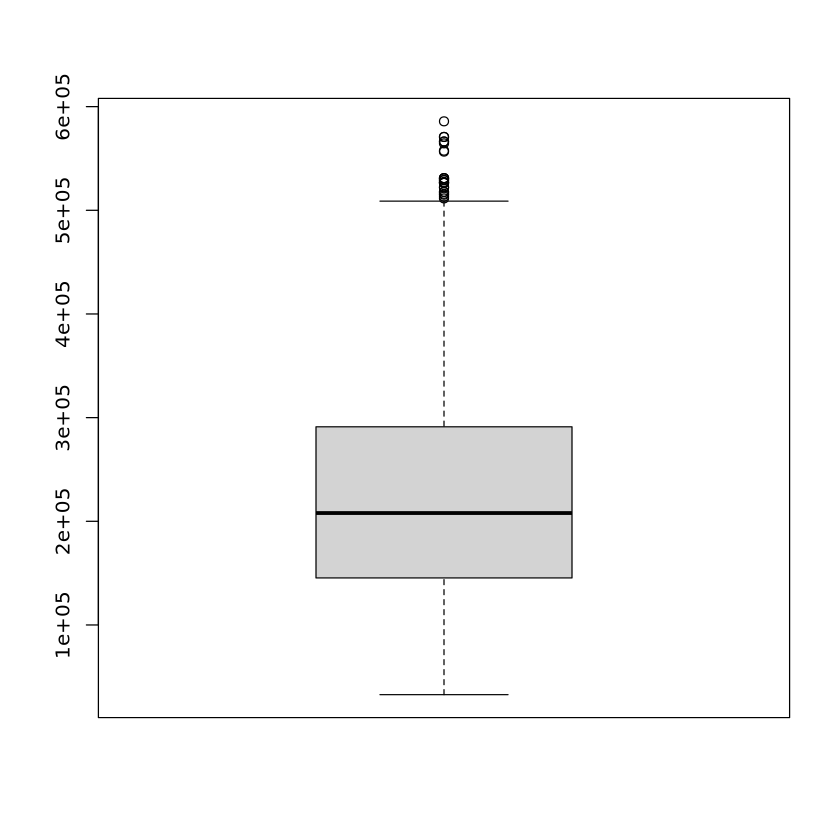

In [31]:
boxplot(data$SalePrice)$out

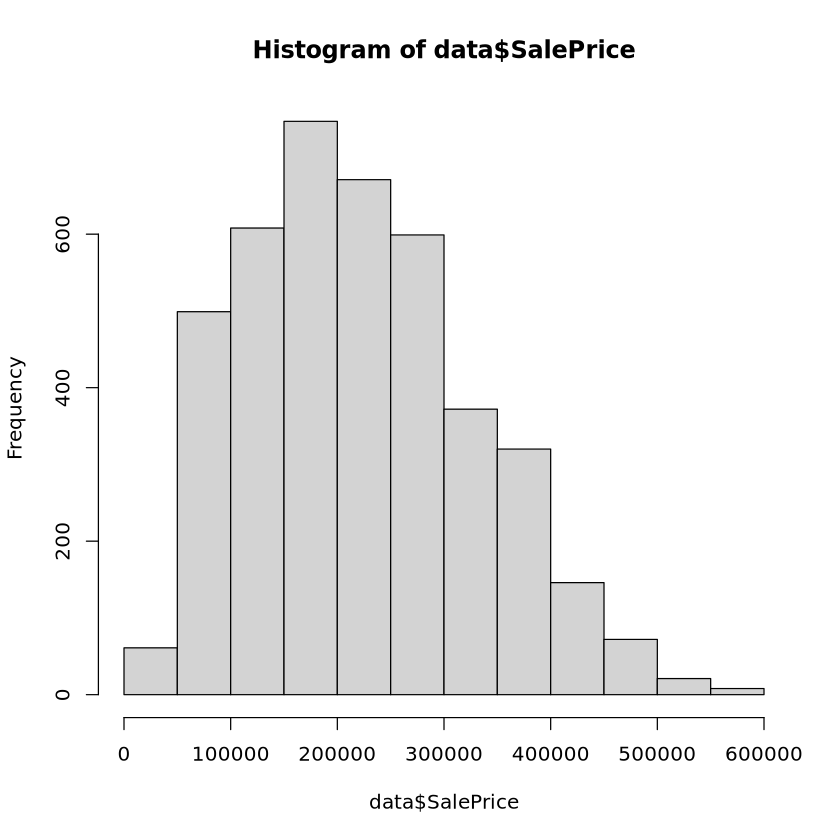

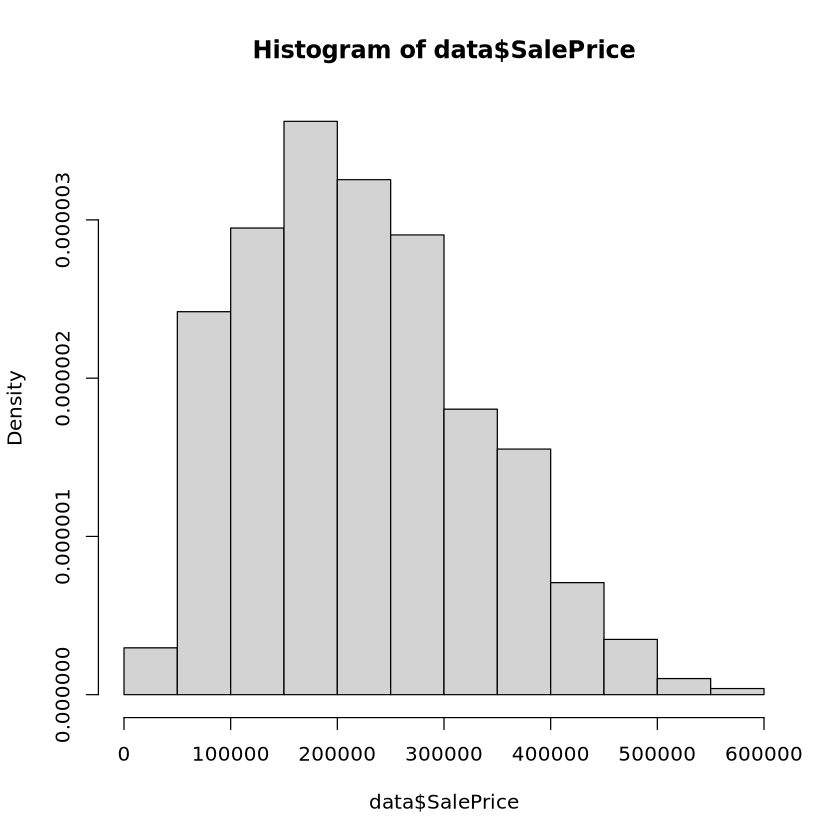

In [35]:
hist(data$SalePrice) #Histograma de frecuencias
hist(data$SalePrice, freq = FALSE) #Densidades de probabilidad

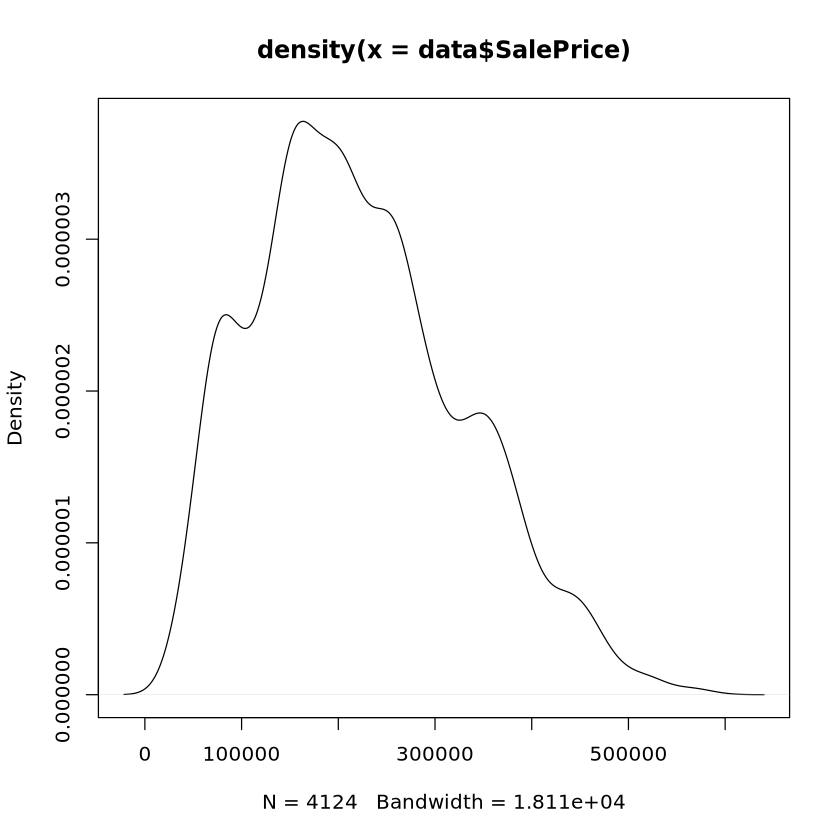

In [36]:
plot(density(data$SalePrice))

## d

In [38]:
cor(data)

ERROR: Error in cor(data): 'x' must be numeric
